# Линейная регрессия
__Суммарное количество баллов: 10__


In [1]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy

In [2]:
def read_data(path="./hw9_data/boston.csv"):
    dataframe = np.genfromtxt(path, delimiter=",", skip_header=15)
    X = dataframe[:, :-1]
    y = dataframe[:, -1]
    return X, y

In [3]:
def generate_synthetic(size, dim=6, noise=0.1):
    X = np.random.randn(size, dim)
    w = np.random.randn(dim + 1)
    noise = noise * np.random.randn(size)
    y = X.dot(w[1:]) + w[0] + noise
    return X, y

### Задание 1 (1 балл)
Для начала нужно понять, какую метрику для ошибки будем использовать. В нашем случае нам подойдет стандартная метрика MSE. Ее и нужно реализовать.

In [4]:
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

### Задание 2 (3 балла)
Теперь реализуем линейную регрессию при помощи явного решения задачи минимизации. 

#### Методы
`fit(X, y)` - решает задачу минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$. 

`predict(X)` - строит предсказание `y` для объектов из `X`.

In [5]:
from numpy.linalg import inv

class NormalLR:
    def __init__(self):
        pass
    
    def fit(self, X, y):
        xx = np.c_[np.full(X.shape[0], 1), X]
        self.w = np.dot(np.dot(inv(np.dot(xx.T, xx)), xx.T), y)
    
    def predict(self, X):
        xx = np.c_[np.full(X.shape[0], 1), X]
        return np.dot(xx, self.w)

In [30]:
X, y = generate_synthetic(1024)
print(np.min(X), np.max(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

-3.719664196232485 4.444989248515545


In [9]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

0.009849022845383117


### Задание 3 (2 балла)
Теперь реализуем линейную регрессию с использованием градиентного спуска с larning rate `alpha` в течении `iterations` итераций.

#### Методы
`fit(X, y)` - приближает решение задачи минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$ при помощи градиентного спуска. 


`predict(X)` - строит предсказание `y` для объектов из `X`.

### Задание 4 (2 балла)
Добавьте в метод `fit` регуляризацию Лассо с коэффициентом `l`. Постройте график зависимости ошибки предсказания данных из синтетического набора данных от коэффициента регуляризации.

In [95]:
class GradientLR:
    def __init__(self, alpha, iterations=10000, l=0.):
        self.alpha = alpha
        self.iter = iterations
        self.l = l
    
    def fit(self, X, y):
        self.w = np.random.uniform(-0.1, 0.1, X.shape[1] + 1)
        xx = np.c_[np.full(X.shape[0], 1), X]
        for _ in range(self.iter):
            y_pred = np.dot(xx, self.w)
            self.w += (2 * self.alpha * (np.dot(xx.T, y-y_pred)) - self.l * np.sign(self.w)) / xx.shape[0] / xx.shape[1]

    def predict(self, X):
        xx = np.c_[np.full(X.shape[0], 1), X]
        return np.dot(xx, self.w)

In [112]:
def build_plot(X_train, y_train, X_test, y_test, iterations=10000):
    ll = np.arange(0, 0.2, 0.01)
    ans = []
    for l in ll:
        regr = GradientLR(0.1, iterations=iterations, l=l)
        regr.fit(X_train, y_train)
        ans.append(mse(y_test, regr.predict(X_test)))
    plt.plot(ll, ans)
    plt.xlabel("Lasso l")
    plt.ylabel("MSE")
    plt.show()

In [105]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

0.009234144251373496


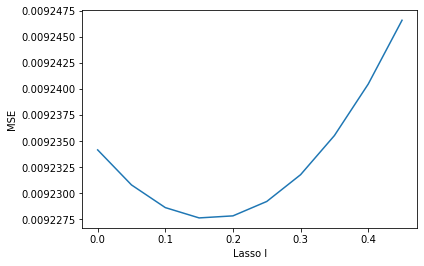

In [108]:
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test)

### Задание 5 (2 балла)
Протесируйте оба метода на данных cancer и spam, для градиентного спуска постройте график зависимости ошибки от коэффициента регуляризации. 

In [116]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
CANCER_DATA_PATH = "hw9_data/cancer.csv"
SPAM_DATA_PATH = "hw9_data/spam.csv"
def read_cancer_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    df = pd.read_csv(path_to_csv, header=0)
    y = [1 if i == 'M' else 0 for i in df["label"]]
    return df.drop("label", axis=1).to_numpy(), np.array(y)

def read_spam_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    df = pd.read_csv(path_to_csv, header=0)
    y = df["label"]
    return df.drop("label", axis=1).to_numpy(), np.array(y.values)

X_cancer, y_cancer = read_cancer_dataset(CANCER_DATA_PATH)
X_cancer = StandardScaler().fit_transform(X_cancer)
#print(np.min(X_cancer), np.max(X_cancer))
X_spam, y_spam = read_spam_dataset(SPAM_DATA_PATH)
X_spam = StandardScaler().fit_transform(X_spam)
#print(np.min(X_spam), np.max(X_spam))

NormalLR 0.059868759834403394
GradientLR 0.060755211937598586


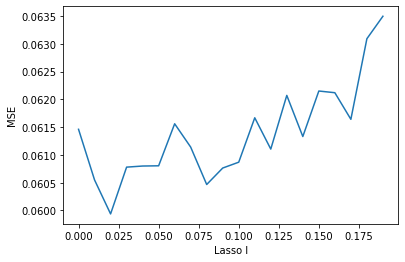

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, train_size=0.8, shuffle=False)
regr = NormalLR()
regr.fit(X_train, y_train)
print("NormalLR", mse(y_test, regr.predict(X_test)))
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
print("GradientLR", mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test, iterations=10000)

NormalLR 0.18996404389207405
GradientLR 0.1894597185320024


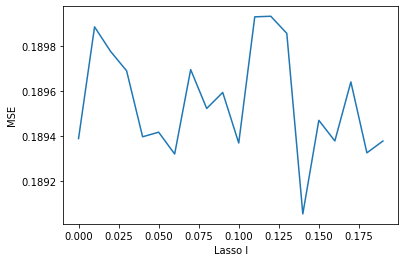

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_spam, y_spam, train_size=0.8, shuffle=False)
regr = NormalLR()
regr.fit(X_train, y_train)
print("NormalLR", mse(y_test, regr.predict(X_test)))
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
print("GradientLR", mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test, iterations=10000)